In [1]:
%matplotlib inline

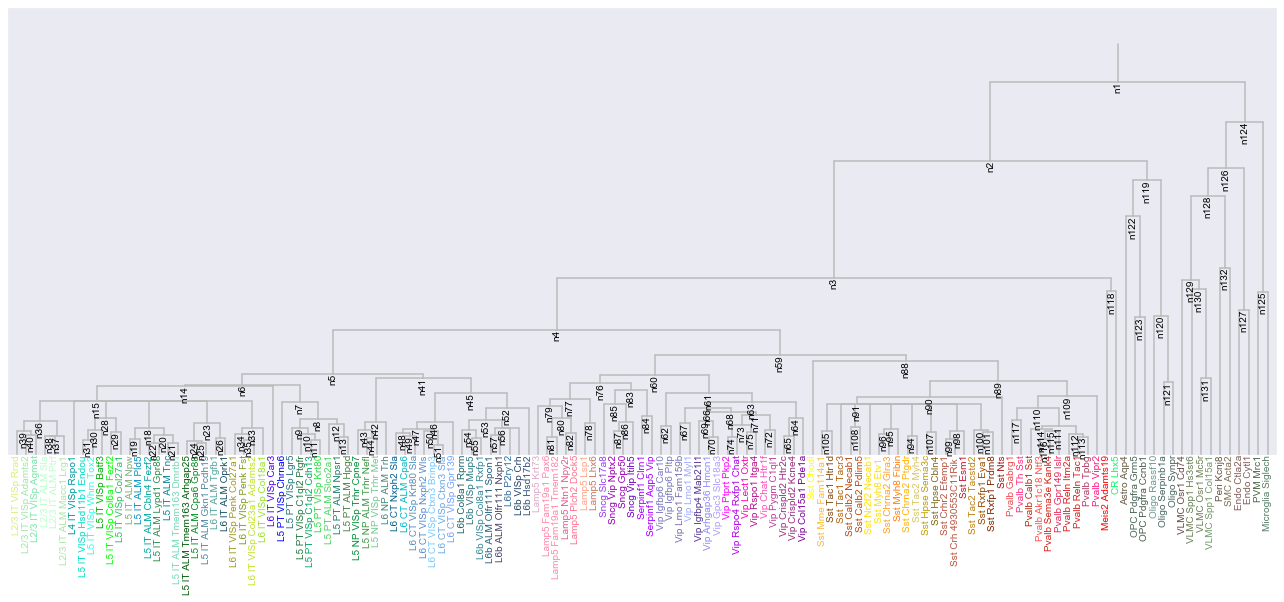

In [2]:
from analysis_tree_helpers import HTree

#Load a tree from the .csv file
htree = HTree(htree_file='./tree_20180520.csv')
htree.plot(figsize=(18,8),fontsize=10)

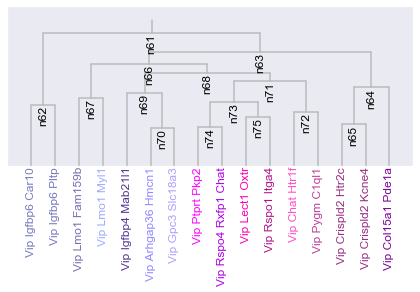

In [3]:
#Extract a subtree from this tree. subtree is a instance of class HTree as well:
subtree = htree.get_subtree(node='n61')
subtree.plot((6,3),fontsize=12)

In [4]:
#Get all ancestor nodes as a list
subtree.get_ancestors(node='n72')

['n71', 'n68', 'n66', 'n63', 'n61', 'n60']

In [5]:
#Get all ancestor nodes as a list, upto a specified rootnode
subtree.get_ancestors(node='n72',rootnode='n63')

['n71', 'n68', 'n66', 'n63']

In [6]:
#Get all descendants of a given node
subtree.get_descendants(node='n64')

['Vip Col15a1 Pde1a', 'n65', 'Vip Crispld2 Htr2c', 'Vip Crispld2 Kcne4']

In [7]:
#Get all descendants of a given node, excluding non-leaf nodes
subtree.get_descendants(node='n64',leafonly=True)

['Vip Crispld2 Kcne4', 'Vip Crispld2 Htr2c', 'Vip Col15a1 Pde1a']

**Valid classifications**

One can obtain many different classifications by ignoring the heights of the hierarchical tree. All these possibilities can be listed as shown below. 

      x         y  isleaf                 child parent      col
0  76.0  0.000000    True        Vip Ptprt Pkp2    n74  #FF00FF
1  77.0  0.000000    True  Vip Rspo4 Rxfp1 Chat    n74  #AF00E6
2  78.0  0.000000    True        Vip Lect1 Oxtr    n75  #FF00B3
3  79.0  0.000000    True       Vip Rspo1 Itga4    n75  #B3128A
4  76.5  0.046457   False                   n74    n73  #000000
5  78.5  0.058979   False                   n75    n73  #000000
6  77.5  0.076612   False                   n73    n71  #000000


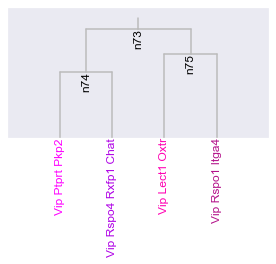

In [8]:
from analysis_tree_helpers import Node, get_valid_classifications

#Define a subtree:
subtree = htree.get_subtree(node='n73')
subtree.plot(figsize=(4,2.5),fontsize=12)

#Get a pandas dataframe for this tree:
subtree_df=subtree.obj2df()
print(subtree_df)

In [9]:
#Define the root node to calculate the different classifications from:
start_node = Node(name='n73',
                  C_list=subtree_df['child'].values,
                  P_list=subtree_df['parent'].values)

#Get all possible classifications consistent with the tree defined by subtree_df
valid_classifications = []
valid_classifications = get_valid_classifications([start_node],
                                                  C_list=subtree_df['child'].values,
                                                  P_list=subtree_df['parent'].values,
                                                  valid_classes=valid_classifications)

#List all the classifications, sorted by the number of classes that remain
valid_classifications.sort(key=len)
for v in valid_classifications:
    print(v)

['n73']
['n74', 'n75']
['Vip Ptprt Pkp2', 'Vip Rspo4 Rxfp1 Chat', 'n75']
['Vip Lect1 Oxtr', 'Vip Rspo1 Itga4', 'n74']
['Vip Lect1 Oxtr', 'Vip Ptprt Pkp2', 'Vip Rspo1 Itga4', 'Vip Rspo4 Rxfp1 Chat']
